## Problem Statement

In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

#### Following the code to get data into the environment:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target
import warnings
warnings.filterwarnings('ignore')

#### Describing the data

In [2]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
targets[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [4]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


All of the features are numeric data

Let's check null values

In [6]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
'Nan' in targets

False

Great ! So, there're no null values in our dataset

#### Data Exploration:

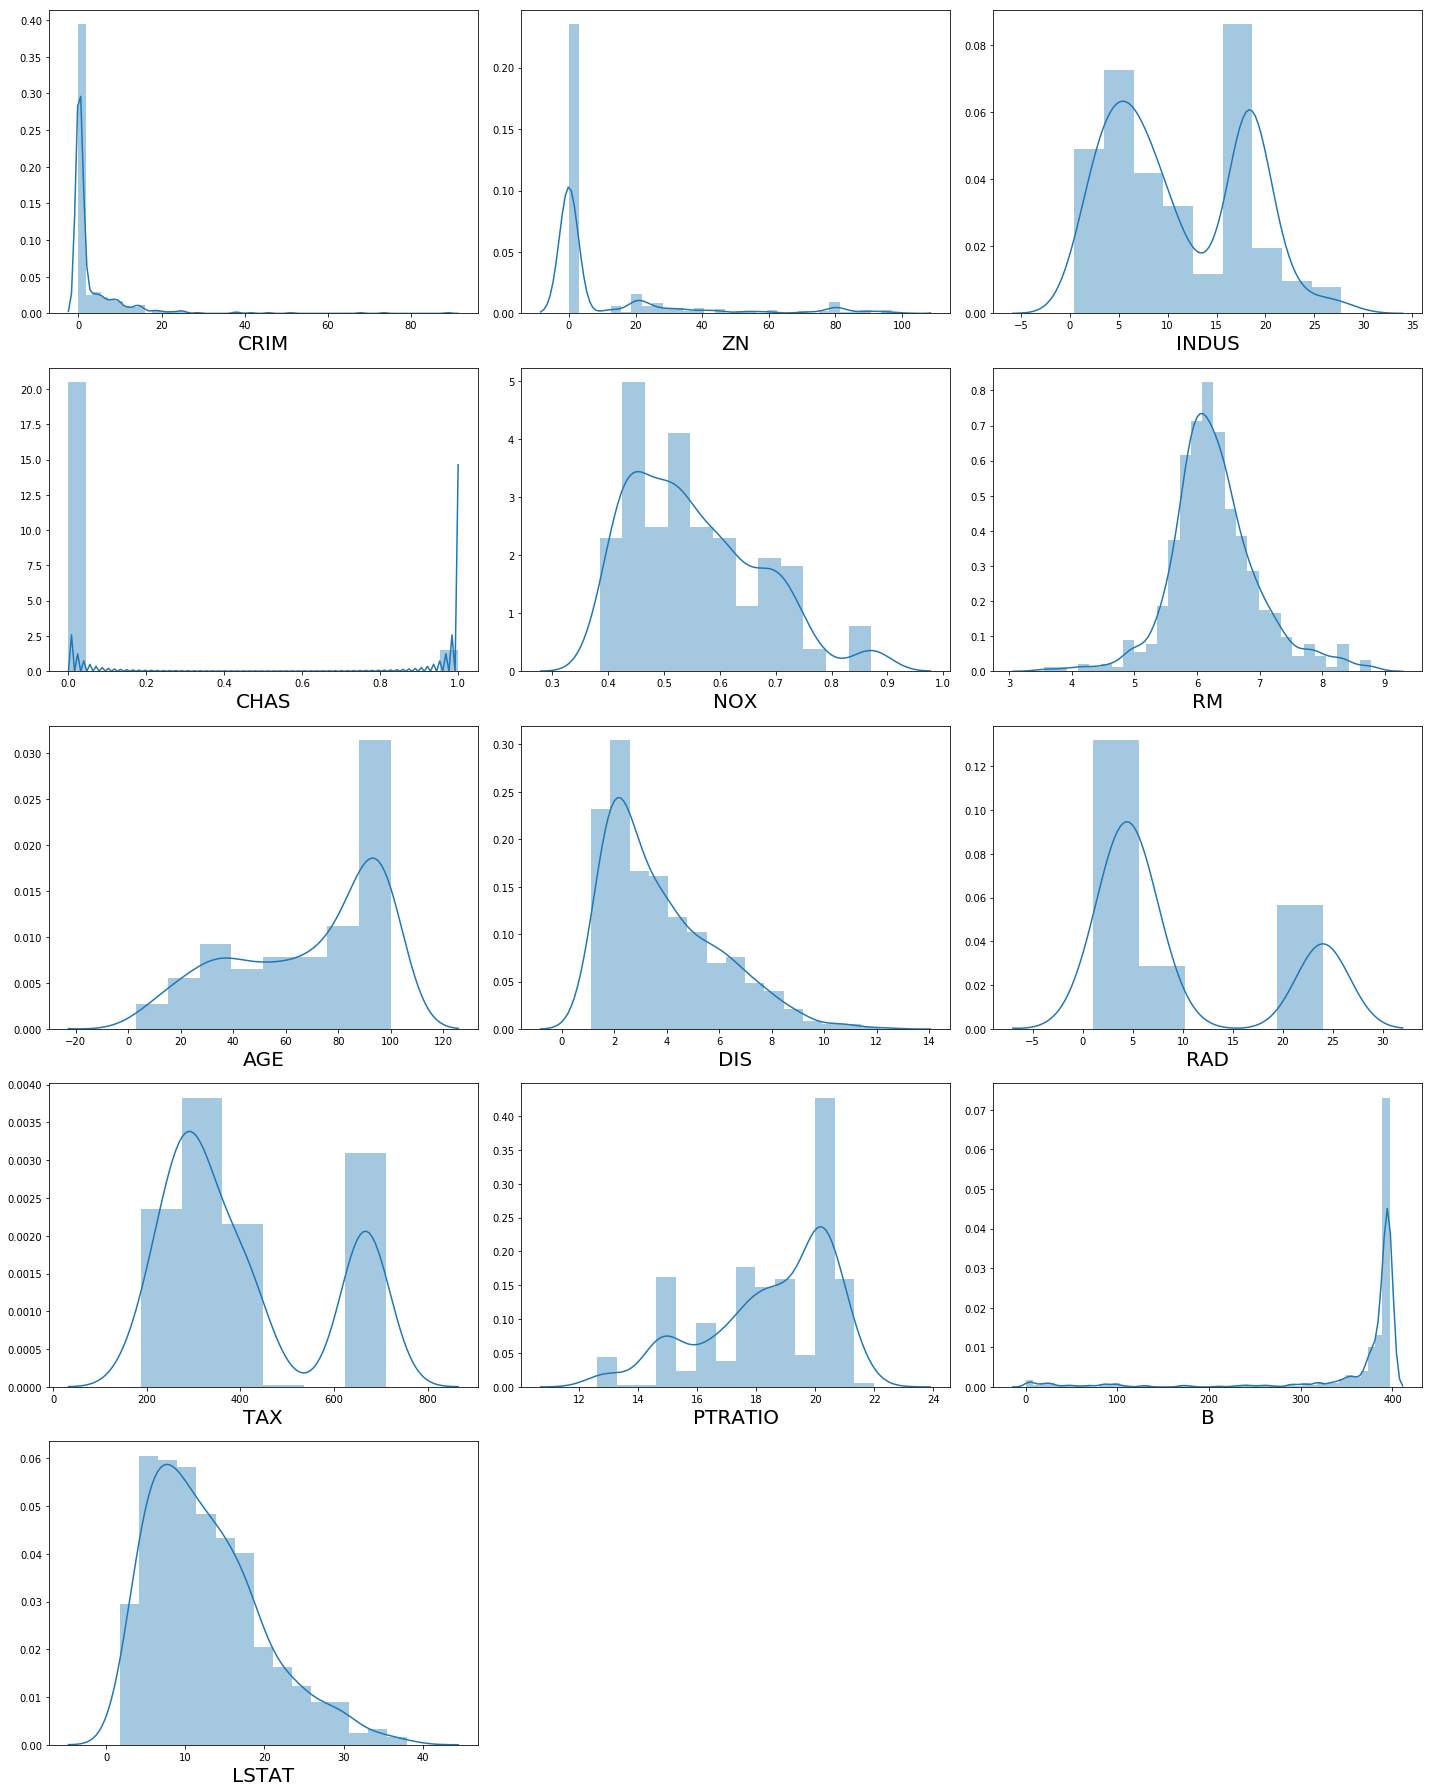

In [8]:
#Now, let's see how data is distributed for every column

plt.figure(figsize=(20,25))

plotnum = 1

for col in features.columns:
    
    if plotnum < 16:
        ax = plt.subplot(5,3,plotnum)
        sns.distplot(features[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
plt.tight_layout()
plt.show()

There are a few outliers in the dataset but as we will be using random forest model, we won't have to work on it manually

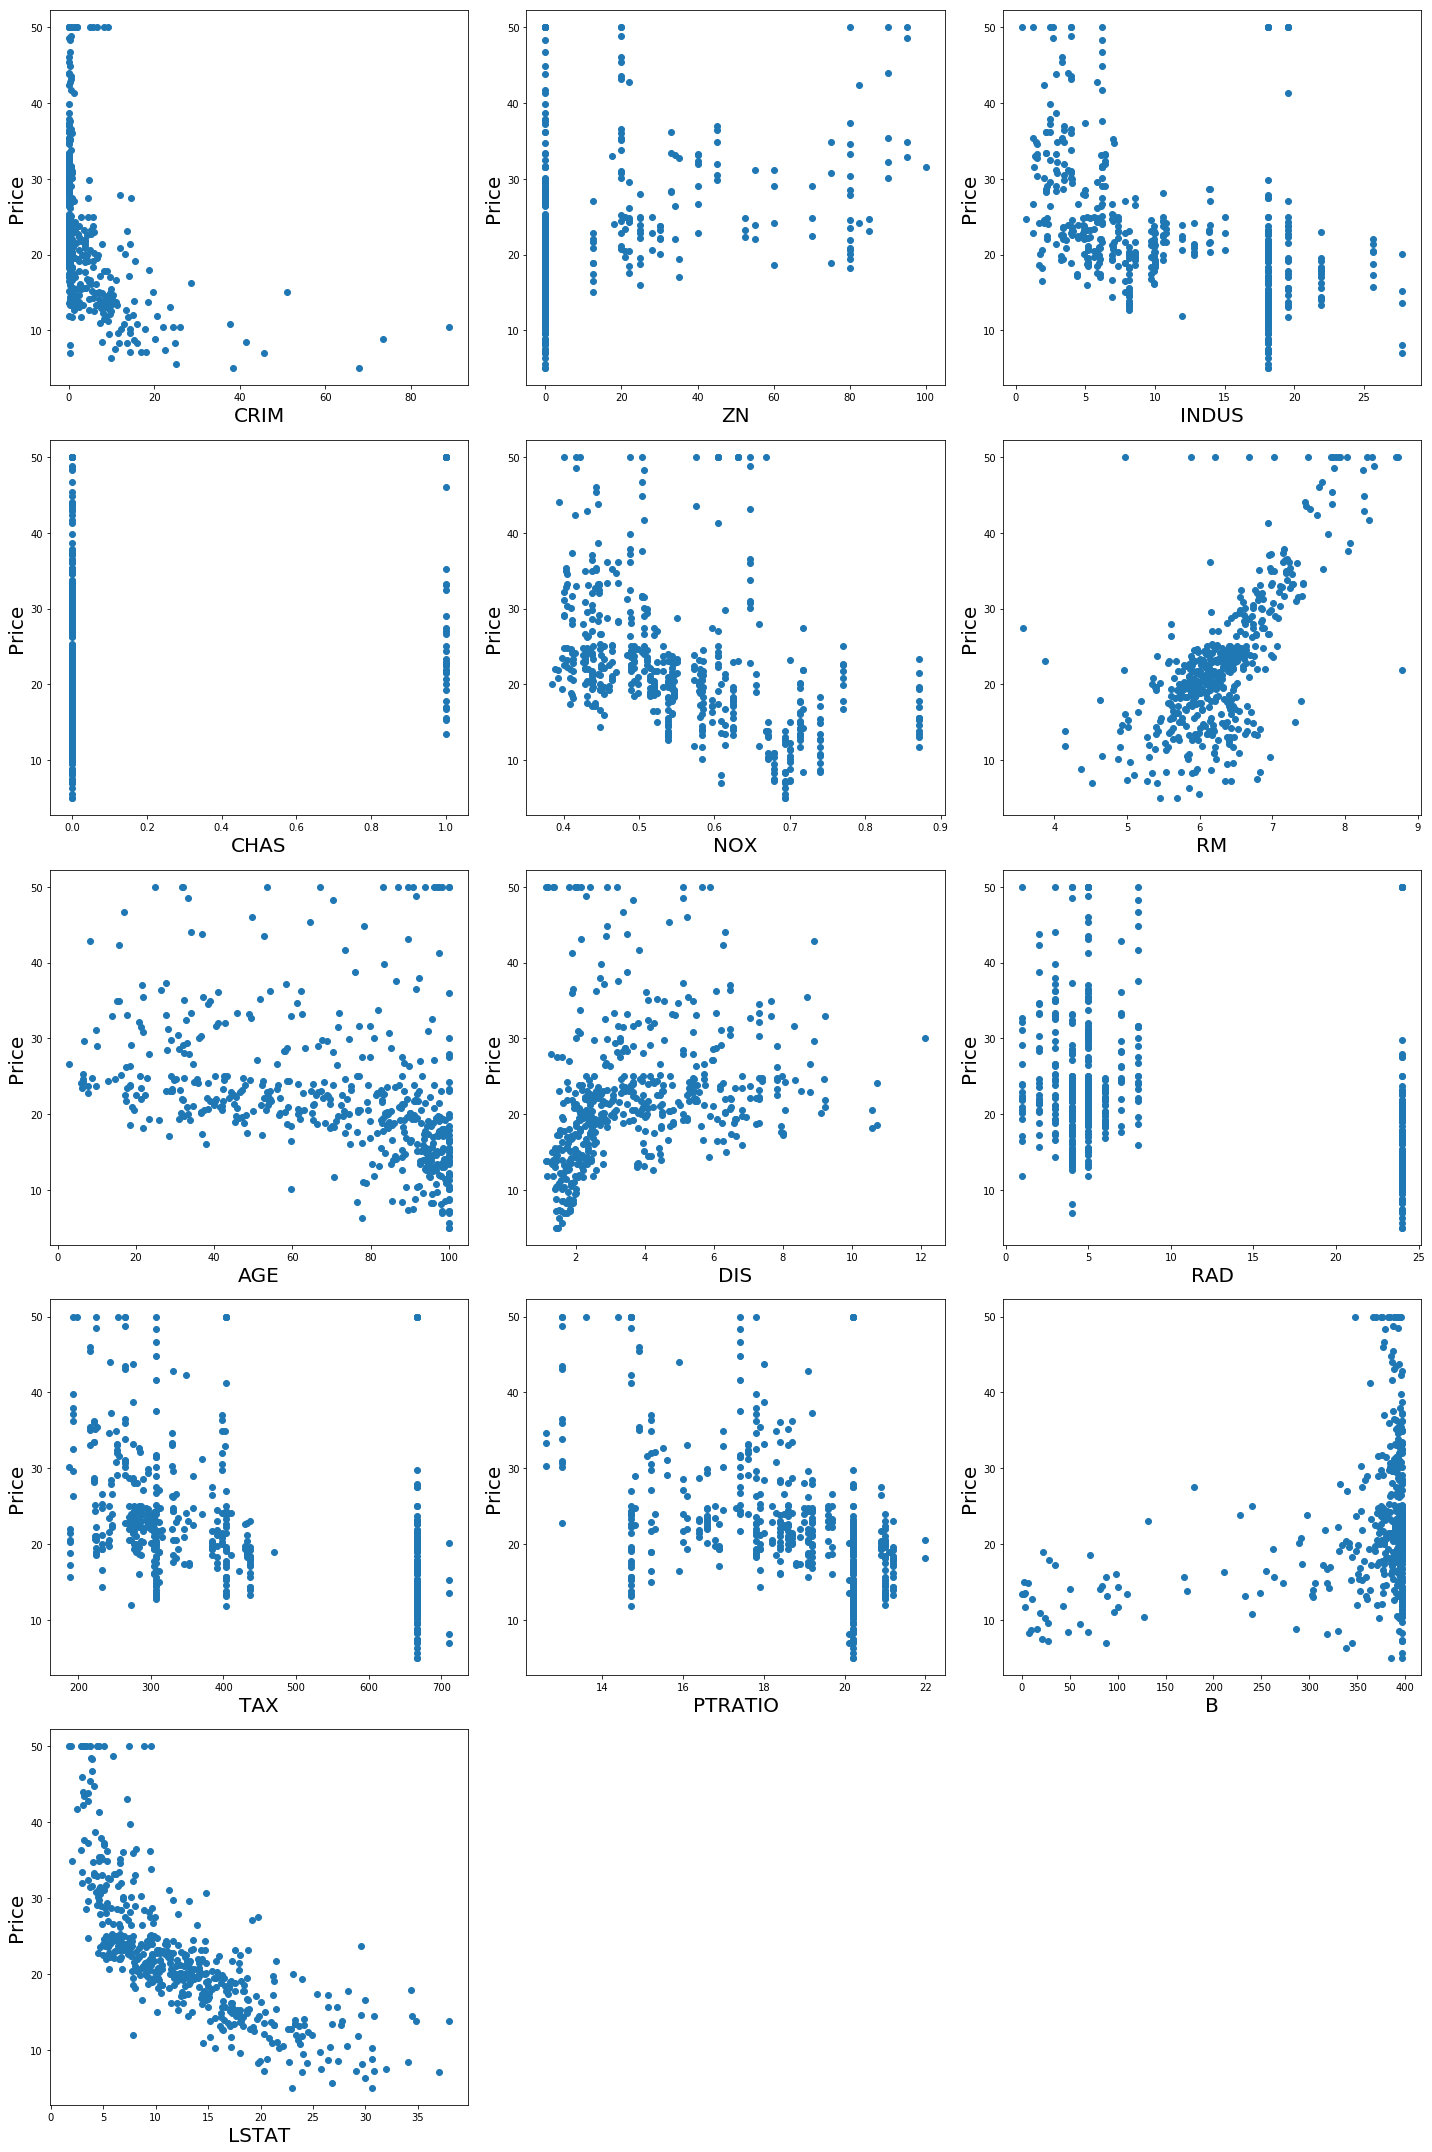

In [9]:
#Now, let's find the columns which are corelated to our price column

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in features.columns:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],targets)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
target_df = pd.DataFrame(targets, columns=['Target'])

full_data = pd.concat([features,target_df], axis = 1)

full_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


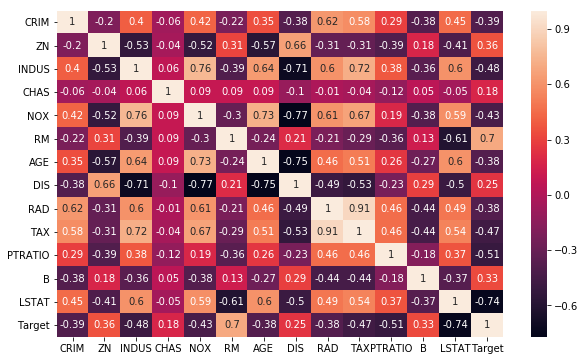

In [11]:
#We can also use correlation matrix here using heatmap:

correlation_matrix = full_data.corr().round(2)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True, )
# annot = True to print the values inside the square

By looking at the correlation matrix and the scatter plot, we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.71)

As per now, let's take only these two features(RM, LSTAT) but later we can take PTRATIO too and compare the accuracy.

And now as we are taking these two features we should that they must not be correlated.

But, first let's scale our data!

In [12]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(features_scaled,i) for i in range(features_scaled.shape[1])]
vif["Features"] = features.columns

#let's check the values
vif

,vif,Features
0,1.773321,CRIM
1,2.298641,ZN
2,3.991194,INDUS
3,1.073943,CHAS
4,4.395064,NOX
5,1.934161,RM
6,3.100860,AGE
7,3.956551,DIS
8,7.480539,RAD
9,9.008472,TAX


* The VIF values are less than 5 for RM and LSTAT. That means no multicollinearity between them.


In [14]:
x = features[['RM', 'LSTAT']]
x.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


#### Model prepration:

In [15]:
x_scaled = scaler.fit_transform(x)

* Now, we can go ahead with fitting our data to the model.
* Before that, let's split our data in test and training set.`

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, targets, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [18]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
model.score(x_test,y_test)

0.3532766942763328

In [20]:
rand_model = RandomForestRegressor(random_state=6)
rand_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [21]:
rand_model.score(x_test, y_test)

0.6721472115852074

We can see that two individual decision trees have both less score than a single random forest classifier. 

So, using random forest classifier has increased the predicitive power of our model. 

Great, let's do some hyperparameter tuning and see if we can increase our accuracy more.

#### Hyperparameter tuning:

In [22]:
grid_param = {
    "n_estimators" : [10,40,70,100],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,10,1)
}

In [23]:
grid_search = GridSearchCV(estimator=rand_model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [24]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   27.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 40, 70, 100], 'criterion': ['mse', 'mae'], 'max_depth': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [25]:
grid_search.best_params_

{'criterion': 'mae', 'max_depth': 5, 'n_estimators': 70}

In [35]:
grid_search.best_score_

0.7482911063988854

Let's tune some more hyperparameters

In [26]:
grid_param_new = {'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'max_features' : ['auto','log2']
                 }

In [27]:
grid_search_new = GridSearchCV(estimator=rand_model,param_grid=grid_param_new,cv=5,n_jobs =-1,verbose = 3)

In [28]:
grid_search_new.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 8), 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
grid_search_new.best_params_

{'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2}

In [34]:
grid_search_new.best_score_

0.762175883524631

In [51]:
grid_search_new.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [86]:
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [89]:
final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [90]:
final_model.score(x_test,y_test)

0.7533478895141013

So, we have got good accuracy now in predicting the price using Random Forest Regressor

# Done !